In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
def zRot(theta):
    rotmat = np.array(
        [ 
            np.cos(theta),
            np.sin(theta),
            0, 
            -np.sin(theta),
            np.cos(theta),
            0, 
            0,
            0,
            1
        ]
    ).reshape(3,3)
    return rotmat

def yRot(theta):
    rotmat = np.array(
        [
            np.cos(theta),
            0,
            np.sin(theta),
            0,
            1,
            0,
            -np.sin(theta),
            0,
            np.cos(theta)
        ]
    ).reshape(3,3)
    
    return rotmat

def xRot(theta):
    rotmat = np.array(
        [
            1,
            0,
            0,
            np.cos(theta),
            np.sin(theta),
            0, 
            -np.sin(theta), 
            np.cos(theta),
            0
        ]
    ).reshape(3,3)
    
    return rotmat

In [4]:
plane=0
oxygen_shift = np.array([0,0,0])
oxygen_shift[plane] = 1
print(oxygen_shift)

[1 0 0]


In [5]:
def ringMaker(d, N, rotmat,oxygen_positions=[],plane=0 , xshift = False, yshift = False, zshift = False):
    """ function to make rings of a specified size
    parameters:
    d: float
        the distance between nodes of the ring
    rotmat: func
        the rotation matrix function to implement (axis orthogonal to plane of 
        ring)
    shifts: bool
        shifts the ring by its radius in the positive direction
    plots: bool
        plot the 2d ring positions
    write: bool
        write the ring positions into an xyz file
    fname: str
        name of the file output. SHOULD INCLUDE THE FILENAME EXTENSION (.xyz) 
    plane describes th eplane that the ring is on (0 for yz, 1 fo xz and 2 xy)
    """
    # distance between clusters
    # angle between clusters:
    theta = 2*np.pi/N
    # radius of each ring:
    r = N*d/(2*np.pi)
    n_oxygen = len(oxygen_positions)
    p = np.zeros((N+2*n_oxygen, 3)) #accounting for hydrogens too
    p[:, :] = [-r, 0, 0]
    
    oxygen_shift = [0,0,0]
    oxygen_shift[plane] = d
    hydrogen_shift = [0,0,0]
    hydrogen_shift[plane]=2*d
    print(hydrogen_shift)
    # calc angles to rotate initial ring position about the given axis
    angles = np.arange(0, N)*theta

    # iterate through all nodes and generate positions by rotation
    for i in range(N):
        theta_i = angles[i]
        rot = rotmat(theta_i)
        p[i, :] = np.dot(rot, p[i, :])
    for i in range(n_oxygen):
        oxygen_ind = i+N
        p[oxygen_ind,:] = p[oxygen_positions[i],:] + oxygen_shift
    for i in range(n_oxygen):
        hydrogen_ind = i+N+ n_oxygen
        p[hydrogen_ind,:] = p[oxygen_positions[i],:] + hydrogen_shift
    # translate the ring by shift
    if xshift:
        p[:, :] += [xshift, 0, 0]
    if yshift:
        p[:, :] += [0, yshift, 0]
    if yshift:
        p[:, :] += [0, 0, zshift ]
    return p,r

def visualize_ring(p,xyPlot=False,yzPlot=False,xzPlot=False):
    if xyPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 0], p[:, 1])
        plt.ylabel("y-axis")
        plt.xlabel("x-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()

    if yzPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 1], p[:, 2])
        plt.ylabel("y-axis")
        plt.xlabel("z-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()

    if xzPlot:
        # plot the xy dimensions of the large ring
        plt.scatter(p[:, 0], p[:, 2])
        plt.ylabel("y-axis")
        plt.xlabel("z-axis")
        plt.title("Position of nodes")
        plt.show()
        plt.close()


def visualize_rings(rings,xyPlot=False,yzPlot=False,xzPlot=False):
    plt.figure()
    ax = plt.axes(projection='3d')
    for ring in rings:
        ax.scatter3D(ring[:,0], ring[:,1],ring[:,2], cmap='Greens')
        ax.plot3D(ring[:,0], ring[:,1],ring[:,2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ##ax.set_xlim([-30,30])
    #ax.set_ylim([-30,30])
    #ax.set_zlim([-30,30])
    ax.set_title("Initial positions of Catenane Molecules")
    

In [6]:
%matplotlib widget


[0.2, 0, 0]
[[-1.59154943e-01 -1.59154943e-01  0.00000000e+00]
 [-1.59154943e-01 -1.28759054e-01  9.35489284e-02]
 [-1.59154943e-01 -4.91815822e-02  1.51365346e-01]
 [-1.59154943e-01  4.91815822e-02  1.51365346e-01]
 [-1.59154943e-01  1.28759054e-01  9.35489284e-02]
 [-1.59154943e-01  1.59154943e-01  1.94908592e-17]
 [-1.59154943e-01  1.28759054e-01 -9.35489284e-02]
 [-1.59154943e-01  4.91815822e-02 -1.51365346e-01]
 [-1.59154943e-01 -4.91815822e-02 -1.51365346e-01]
 [-1.59154943e-01 -1.28759054e-01 -9.35489284e-02]
 [-5.91549431e-02 -1.28759054e-01  9.35489284e-02]
 [-5.91549431e-02 -4.91815822e-02  1.51365346e-01]
 [-5.91549431e-02  4.91815822e-02  1.51365346e-01]
 [ 4.08450569e-02 -1.28759054e-01  9.35489284e-02]
 [ 4.08450569e-02 -4.91815822e-02  1.51365346e-01]
 [ 4.08450569e-02  4.91815822e-02  1.51365346e-01]]


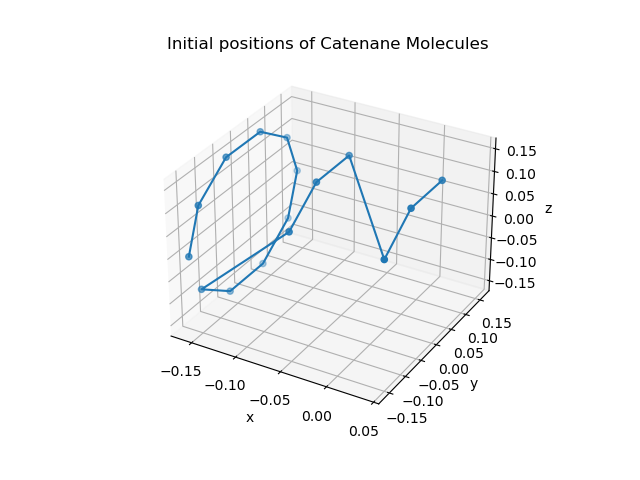

In [7]:
N_small = 10
p_small,r_small = ringMaker(d = 0.1, N = N_small, rotmat = xRot,oxygen_positions=[1,2,3],plane=0,yshift=0,xshift = 0,zshift=0)
visualize_rings([p_small])
print(p_small)

In [20]:
def write_pdb(molecule_coordinate_sets,fname,description,res_names,oxygen_locations=[[-1],[-1]]):
    #molecule_coordinate_sets Is a list of matrices containing coordinates
    #res_names is a list of the residue names
    #fname is the file name to write to
    #description is a description of the file contents
    
    pdb_headers = [
            "Record", #1
            "Atom Number",#2
            "Atom Name",#3
            "Alternate location indicator",#4
            "residue name",#5
            "Chain",#6
            "Residue Sequence Number",#7
            "Code for insertions of residue",#8
            "x",#9
            "y",#10
            "z",#11
            "occupancy",#12
            "temperature factor", #13
            "element symbol", #14
            "charge of atom" #15
        ]
    atom_start_index = 0
    res_sequence_number = 1
    full_pdb_df = pd.DataFrame(columns = pdb_headers)
    n_atoms =0
    
    for i,molecule_coordinate_set in enumerate(molecule_coordinate_sets):
        specific_ring_oxygen_locations = oxygen_locations[i]
        
        n_atoms = np.shape(molecule_coordinate_set)[0]
        if specific_ring_oxygen_locations[0] != -1:
            n_oxygen = len(specific_ring_oxygen_locations)
            n_hydrogen = n_oxygen
        else:
            n_oxygen = 0
            n_hydrogen = 0
        n_carbon = n_atoms - n_oxygen - n_hydrogen
        specific_ring_oxygen_locations = [location + n_atoms for location in specific_ring_oxygen_locations]
        res_name = res_names[i]
        
        
        #Creating dataframe object containing all pdb formatting 
        
        pdb_df = pd.DataFrame(columns = pdb_headers)
        atom_number= []
        atom_name=[]
        element_symbol=[]
        
        for i in range(n_atoms):
            atom_num = atom_start_index+i+1
            atom_number.append(atom_num)
            if i < n_carbon:
                atom_name.append(f"C{atom_num}")
                element_symbol.append("C")
            elif i < n_carbon+n_oxygen:
                atom_name.append(f"O{atom_num}")
                element_symbol.append("O")
            else:
                atom_name.append(f"H{atom_num}")
                element_symbol.append("H")
        pdb_df["Record"] = ["HETATM" for i in range(n_atoms)]
        pdb_df["Atom Number"] = atom_number
        pdb_df["Atom Name"] = atom_name
        pdb_df["Alternate location indicator"] =["" for i in range(n_atoms)]
        pdb_df["residue name"] = [res_name for i in range(n_atoms)]
        pdb_df["Chain"] = ["A" for i in range(n_atoms)]
        pdb_df["Residue Sequence Number"] = [res_sequence_number for i in range(n_atoms)]
        pdb_df["Code for insertions of residue"] = ["" for i in range(n_atoms)]
        pdb_df["x"] = molecule_coordinate_set[:,0] #float
        pdb_df["y"] = molecule_coordinate_set[:,1] #float
        pdb_df["z"] = molecule_coordinate_set[:,2] #float
        pdb_df["occupancy"] = [1 for i in range(n_atoms)] #float
        pdb_df["temperature factor"] = [0 for i in range(n_atoms)]
        pdb_df["element symbol"] = element_symbol
        pdb_df["charge of atom"] = ["" for i in range(n_atoms)]
        
        if len(molecule_coordinate_sets) >1:
            atom_start_index += n_atoms
            res_sequence_number += 1
        
        full_pdb_df = pd.concat([full_pdb_df, pdb_df], axis=0)
    #extracting data values for file writing
    data = full_pdb_df.values
    
    
    #writing file
    OUT=open(f"./pdb_files/{fname}.pdb",'w')
    outline = f"HEADER    {description}"
    OUT.write(outline+"\n")
    outline = f"MODEL     1"
    OUT.write(outline+"\n")
    for index, line in enumerate(data):
        #s-> str d_. int %f -> float
        outline="{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}".format(
            line[0],
            line[1],
            line[2],
            line[3],
            line[4],
            line[5],
            line[6],
            line[7],
            line[8],
            line[9],
            line[10],
            line[11],
            line[12],
            line[13],
            line[14]
        )
        OUT.write(outline+"\n")
    outline = "{:6s}{:5d}".format("TER",atom_start_index+n_atoms+1)
    OUT.write(outline+"\n")
    outline = "{:6s}".format("END")
    OUT.write(outline+"\n")
    
    return full_pdb_df
    

[0, 0, 0.2]
[0.2, 0, 0]


,Record,Atom Number,Atom Name,Alternate location indicator,residue name,Chain,Residue Sequence Number,Code for insertions of residue,x,y,z,occupancy,temperature factor,element symbol,charge of atom
0,HETATM,1,C1,,SM,A,1,,-0.159155,3.023944,0.000000,1,0,C,
1,HETATM,2,C2,,SM,A,1,,-0.159155,3.054340,0.093549,1,0,C,
2,HETATM,3,C3,,SM,A,1,,-0.159155,3.133917,0.151365,1,0,C,
3,HETATM,4,C4,,SM,A,1,,-0.159155,3.232280,0.151365,1,0,C,
4,HETATM,5,C5,,SM,A,1,,-0.159155,3.311858,0.093549,1,0,C,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,HETATM,218,O218,,LG,A,2,,-3.176818,0.199868,0.100000,1,0,O,
202,HETATM,219,O219,,LG,A,2,,-3.168972,0.299556,0.100000,1,0,O,
203,HETATM,220,H220,,LG,A,2,,-3.181528,0.099984,0.200000,1,0,H,
204,HETATM,221,H221,,LG,A,2,,-3.176818,0.199868,0.200000,1,0,H,


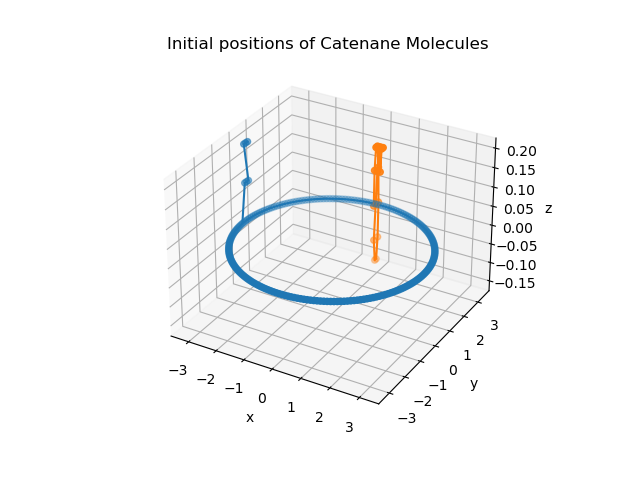

In [30]:
#Parameter definition

fname="combined_rings_H_bonds"

oxygen_locations = [
    [1,2,3], #Small ring
    [1,2,3]  #Large Ring
]

res_names = ["SM","LG"]

N_small = 10 
N_large = 200
description = f"interlinked with {N_small} atoms spaced evenly around a circle for the small ring and {N_large} for the large ring with 3 hydrogen binding spots on each ring" 

#Ring definitions
p_large,r_large= ringMaker(d = 0.1, N = N_large, rotmat = zRot,oxygen_positions=oxygen_locations[1],plane=2,yshift=0,xshift = 0,zshift=0)
p_small,r_small = ringMaker(d = 0.1, N = N_small, rotmat = xRot,oxygen_positions=oxygen_locations[0],plane=0,yshift=r_large,xshift = 0,zshift=0)



#Creating small ring offset in y
molecule_coordinate_sets=[p_small,p_large]
combined_ring_pdb_df= write_pdb(molecule_coordinate_sets,fname,description,res_names,oxygen_locations)

display(combined_ring_pdb_df)

visualize_rings([p_large,p_small])


In [25]:
display(combined_ring_pdb_df)

,Record,Atom Number,Atom Name,Alternate location indicator,residue name,Chain,Residue Sequence Number,Code for insertions of residue,x,y,z,occupancy,temperature factor,element symbol,charge of atom
0,HETATM,1,C1,,SM,A,1,,-0.159155,3.023944,0.000000,1,0,C,
1,HETATM,2,C2,,SM,A,1,,-0.159155,3.054340,0.093549,1,0,C,
2,HETATM,3,C3,,SM,A,1,,-0.159155,3.133917,0.151365,1,0,C,
3,HETATM,4,C4,,SM,A,1,,-0.159155,3.232280,0.151365,1,0,C,
4,HETATM,5,C5,,SM,A,1,,-0.159155,3.311858,0.093549,1,0,C,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,HETATM,218,O218,,LG,A,2,,-3.176818,0.199868,0.100000,1,0,O,
202,HETATM,219,O219,,LG,A,2,,-3.168972,0.299556,0.100000,1,0,O,
203,HETATM,220,H220,,LG,A,2,,-3.181528,0.099984,0.200000,1,0,H,
204,HETATM,221,H221,,LG,A,2,,-3.176818,0.199868,0.200000,1,0,H,


In [8]:
%matplotlib widget


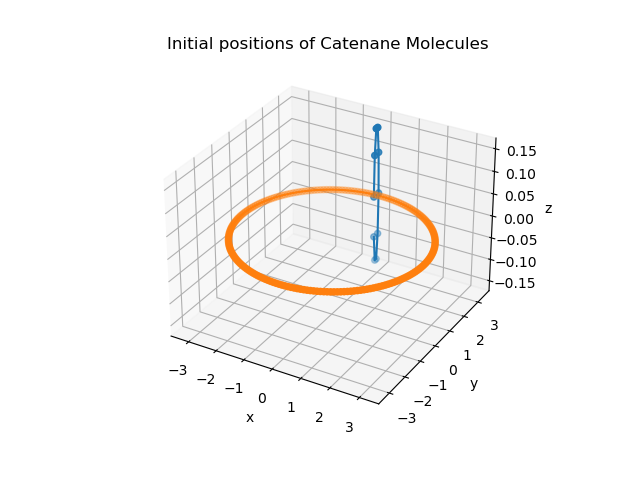

In [102]:
plt.close()
visualize_rings([p_small,p_large])



In [4]:
from openmm.app import *
from openmm import *
#from openmm.unit import *
from sys import stdout

In [8]:
pdb = PDBFile('./pdb_files/small_ring.pdb')

In [87]:
combined_ring_pdb_df["residue name"].unique()

array(['LG'], dtype=object)

In [42]:
#xml_template = open("./pdb_files/forcefield.txt", "r")
#print(xml_template.read())
#\n\t\t<Residue name="small">'
def generate_bond_and_atom_tags(pdb_df,residue_names,oxygen_locations):
    n_residues = len(pdb_df["residue name"].unique())
    set_of_atom_tags = []
    set_of_bond_tags = []
    for residue_i in range(n_residues):
        residue_oxygen_locations = oxygen_locations[residue_i]
        atom_tags=""
        bond_tags=""
        min_residue_atom_number = pdb_df["Atom Number"][pdb_df["residue name"]==residue_names[residue_i]].min()
        n = len(pdb_df["Atom Name"][pdb_df["residue name"]==residue_names[residue_i]])
        atom_names = pdb_df["Atom Name"][pdb_df["residue name"]==residue_names[residue_i]]
        
        n_atoms = pdb_df["Atom Name"][(pdb_df["residue name"]==residue_names[residue_i])]
        n_carbon = len(pdb_df["Atom Name"][(pdb_df["residue name"]==residue_names[residue_i]) & (pdb_df["element symbol"]=="C")])
        n_oxygen = len(residue_oxygen_locations)
        n_hydrogen = n_oxygen
        for i in range(n_carbon):
            atom_tags += f'\n\t\t\t<Atom name = "{atom_names[i]}" type = "0"/>'
            if i+min_residue_atom_number == n_carbon+min_residue_atom_number-1:
                bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[i]}" atomName2 = "{atom_names[0]}"/>'
            else:
                bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[i]}" atomName2 = "{atom_names[i+1]}"/>'
        for i in range(n_oxygen):
            atom_tags += f'\n\t\t\t<Atom name = "{atom_names[i+n_carbon]}" type = "1"/>' #for oxygens
            atom_tags += f'\n\t\t\t<Atom name = "{atom_names[i+n_carbon+ n_oxygen]}" type = "2"/>' #for hydrogens
                            
            bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[residue_oxygen_locations[i]]}" atomName2 = "{atom_names[i+n_carbon]}"/>'
            bond_tags += f'\n\t\t\t<Bond atomName1 = "{atom_names[i+n_carbon]}" atomName2 = "{atom_names[i+n_carbon+ n_oxygen]}"/>' #oxygen to hydrogen bond
            

        set_of_atom_tags.append(atom_tags)
        set_of_bond_tags.append(bond_tags)
    return set_of_atom_tags,set_of_bond_tags



def write_forcefield_xml(set_of_atom_tags,set_of_bond_tags,residue_names):
    atom_types = [
        '\n\t\t<Type name="0" class="C" element="C" mass="12.011"/>',
        '\n\t\t<Type name="1" class="O" element="O" mass="16.00"/>',
        '\n\t\t<Type name="2" class="H" element="H" mass="1.01"/>'
    ]
    top_file_template = f'<ForceField>\n\t<AtomTypes>{atom_types[0]}{atom_types[1]}{atom_types[2]}\n\t</AtomTypes>\n\t<Residues>'
    
    
    bottom_file_template = '\n\t</Residues>\n\t<HarmonicBondForce>\n\t\t<Bond class1="C" class2="C" length="0.1525" k="259408.0"/>\n\t</HarmonicBondForce>\n\t<HarmonicAngleForce>\n\t\t<Angle class1="C" class2="C" class3="C" angle="1.904" k="20920"/>\n\t</HarmonicAngleForce>\n\t<NonbondedForce coulomb14scale="0.833333" lj14scale="0.5">\n\t\t<Atom type="0" charge="0" sigma="0.36239" epsilon="0.83011"/>\n\t</NonbondedForce>\n</ForceField>'
    xml_file = top_file_template
    
    n_residues = len(set_of_atom_tags)
    for i in range(n_residues):
        residue_name = residue_names[i]
        residue_tag_start_format = f'\n\t\t<Residue name="{residue_name}">'
        residue_end_tag = '\n\t\t</Residue>'
        xml_file+= residue_tag_start_format
        xml_file += set_of_atom_tags[i]
        xml_file += set_of_bond_tags[i]
        xml_file +=residue_end_tag
    xml_file += bottom_file_template 
    OUT=open(f"./pdb_files/forcefield.xml",'w')
    OUT.write(xml_file)
    return xml_file

In [44]:
set_of_atom_tags,set_of_bond_tags = generate_bond_and_atom_tags(combined_ring_pdb_df,res_names,oxygen_locations)
xml_file = write_forcefield_xml(set_of_atom_tags,set_of_bond_tags,res_names)

In [9]:
def addBondsToPDB(pdb):
    n_atoms = pdb.topology.getNumAtoms()
    for i in range(1,n_atoms+1):
        if i == n_atoms: 
            pdb.topology.addBond(n_atoms,i,type="single")
        else:
            pdb.topology.addBond(i,i+1,type="single")
    return pdb


flat_bottom_force = CustomBondForce('step(r-r0) * (k/2) * (r-r0)^2')
flat_bottom_force.addPerBondParameter('r0')
flat_bottom_force.addPerBondParameter('k')
#system.addForce(flat_bottom_force)


1

In [13]:
from openmm import app
import openmm as mm
from openmm import unit
import sys
import h5py
import numpy as np
import os

def runSim(T = 50, gamma = 1/50, len = 10, dt = 0.1, skipSteps = 1, f_pdb = "pdb", 
           f_ff = "forcefield"):
    """
    Function to run the openMM simulation (NVT) with given params and 
    pdb+forcefields 

    parameters:
    T: int
        Temperature
    gamma: float
        Friction parameters for Langevin
    len: float
        Total length of the simulation in ps
    dt: float
        Size of the timesteps in ps
    f_pdb: str
        Name of the pdb file (excluding the file extension, which should 
        simply be .pdb)
    f_ff: str
        Name of the forcefield file (excluding the file extension, which should 
        simply be .xml)
    """
    # set up strings
    # THE FOLLOWING FILE NAMES ARE PLACEHOLDERS: CHANGE WHEN POSSIBLE
    path = os.getcwd()
    pdbPath = os.path.join(path, "pdb_files/{}.pdb".format(f_pdb))
    forcefieldPath = os.path.join(path, "pdb_files/{}.xml".format(f_ff))

    beta = 1./T
    steps = int(len/dt)
    indSteps = int(len/(dt*skipSteps))

    pdb = app.PDBFile(pdbPath)

    topo = pdb.topology

    particles = []
    for atom in topo.atoms():
        particles.append(atom)

    # rough shitty code below NOT VERY ROBUST
    carbons = particles[0:20]
    hy1 = particles[20:40]
    hy2 = particles[40:60]

    for i, C in enumerate(carbons):
        # print("Carbon: {}, {}".format(C, Cs[i-1]))
        # print("Hydrogen: {}, {}".format(H1s[i], H2s[i]))
        topo.addBond(C, carbons[i-1])
        topo.addBond(C, hy1[i])
        topo.addBond(C, hy2[i])

    forcefield = app.ForceField(forcefieldPath)
    unmatched_residues = forcefield.getUnmatchedResidues(topo)
    print("unmatched residues\n", unmatched_residues)
    nonbonded = app.NoCutoff
         
    system = forcefield.createSystem(topo, nonbondedMethod = nonbonded,
                                    nonbondedCutoff = 1e3*unit.nanometer,
                                    constraints = None)

    integrator = mm.LangevinIntegrator(T*unit.kelvin, gamma, dt*unit.femtoseconds)

    platform = mm.Platform.getPlatformByName('Reference')
    simulation = app.Simulation(pdb.topology, system, integrator, platform)
    simulation.context.setPositions(pdb.positions)
    simulation.context.computeVirtualSites()
    simulation.context.setVelocitiesToTemperature(T*unit.kelvin)

    state = simulation.context.getState(getForces = True, getEnergy = True,
                                        getPositions = True)
    

    for step in range(steps):
        simulation.step(skipSteps)
        state = simulation.context.getState(getEnergy=True)
        KE = state.getKineticEnergy()/unit.kilojoules_per_mole
        PE = state.getPotentialEnergy()/unit.kilojoules_per_mole
        print(KE)
        print(PE)

if __name__ == "__main__":
     runSim(T = 50, gamma = 1/50, len = 1, dt = 0.1, skipSteps = 1, f_pdb = "small_ring_full", 
           f_ff = "forcefield_sm")

AttributeError: 'Modeller' object has no attribute 'forcefield'